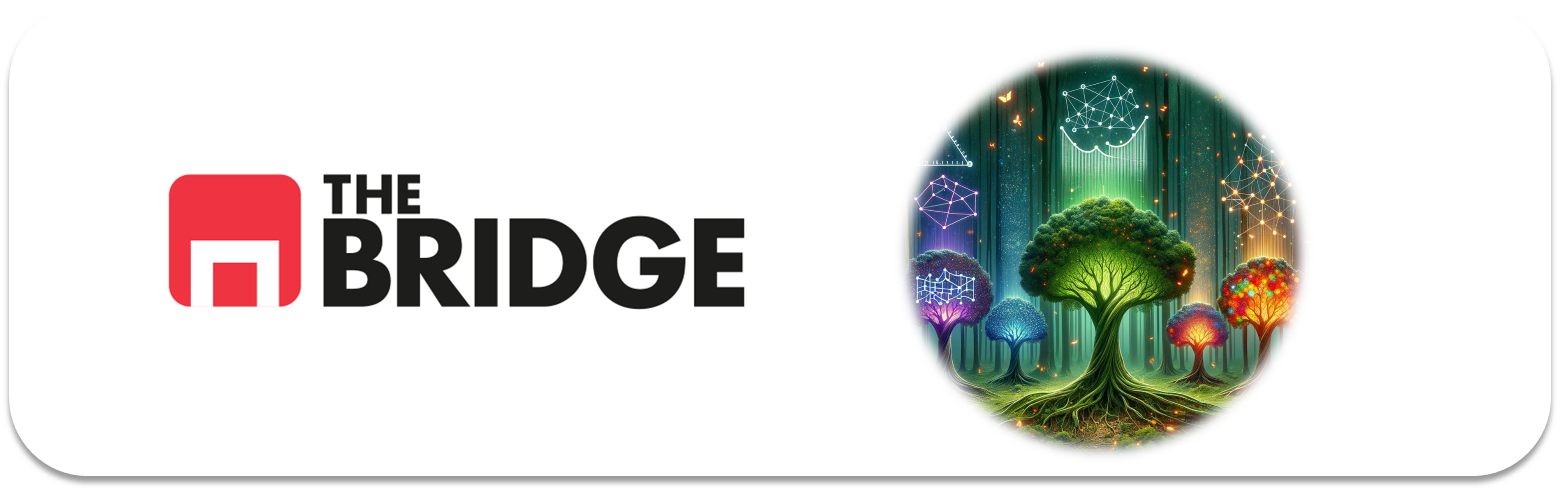

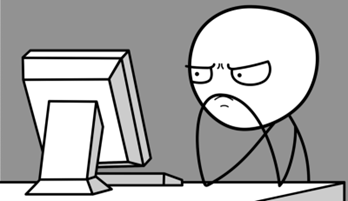

Para ejercitarte y afianzar lo aprendido sobre **Regresion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

Este conjunto de ejercicios trabajan sobre un dataset de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average



### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt


### Ejercicio 1

Importa el csv "temps.csv"

In [2]:
df = pd.read_csv("./data/temps.csv")

### Ejercicio 2

Haz un one-hot encoding de las variables categóricas del dataset

In [3]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [4]:
df = pd.get_dummies(df, columns=['week'])

# Ver las primeras filas
print(df.head())

   year  month  day  temp_2  temp_1  average  actual  forecast_noaa  \
0  2016      1    1      45      45     45.6      45             43   
1  2016      1    2      44      45     45.7      44             41   
2  2016      1    3      45      44     45.8      41             43   
3  2016      1    4      44      41     45.9      40             44   
4  2016      1    5      41      40     46.0      44             46   

   forecast_acc  forecast_under  friend  week_Fri  week_Mon  week_Sat  \
0            50              44      29      True     False     False   
1            50              44      61     False     False      True   
2            46              47      56     False     False     False   
3            48              46      53     False      True     False   
4            46              46      41     False     False     False   

   week_Sun  week_Thurs  week_Tues  week_Wed  
0     False       False      False     False  
1     False       False      False     F

### Ejercicio 3

Divide en train y test

In [5]:
from sklearn.model_selection import train_test_split

# Variables predictoras (todas menos 'actual') y objetivo ('actual')
X = df.drop('actual', axis=1)
y = df['actual']

# Dividir en 80% train y 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### Ejercicio 4

Instancia un DecisionTreeRegressor de sklearn con hiperparámetros por defecto y entrénalo.

In [6]:
from sklearn.tree import DecisionTreeRegressor

# Instanciar el modelo con hiperparámetros por defecto
regresor_arbol = DecisionTreeRegressor()

# Entrenar el modelo con los datos de entrenamiento
regresor_arbol.fit(X_train, y_train)

DecisionTreeRegressor()

### Ejercicio 5

Calcula su MAE sin usar sklearn.

In [7]:
y_pred = regresor_arbol.predict(X_test)

# Calcular MAE manualmente
errores_absolutos = np.abs(y_test - y_pred)
mae = np.mean(errores_absolutos)

print(f"MAE (calculado manualmente): {mae:.4f}")

MAE (calculado manualmente): 5.0000


### Ejercicio 6

Calcula su MAPE sin usar sklearn

In [10]:
error = abs(y_test - y_pred)
print('MAPE:',np.round(100*np.mean(error/y_test),2),'%')

MAPE: 7.82 %


### Ejercicio 7

Representa el árbol de decision

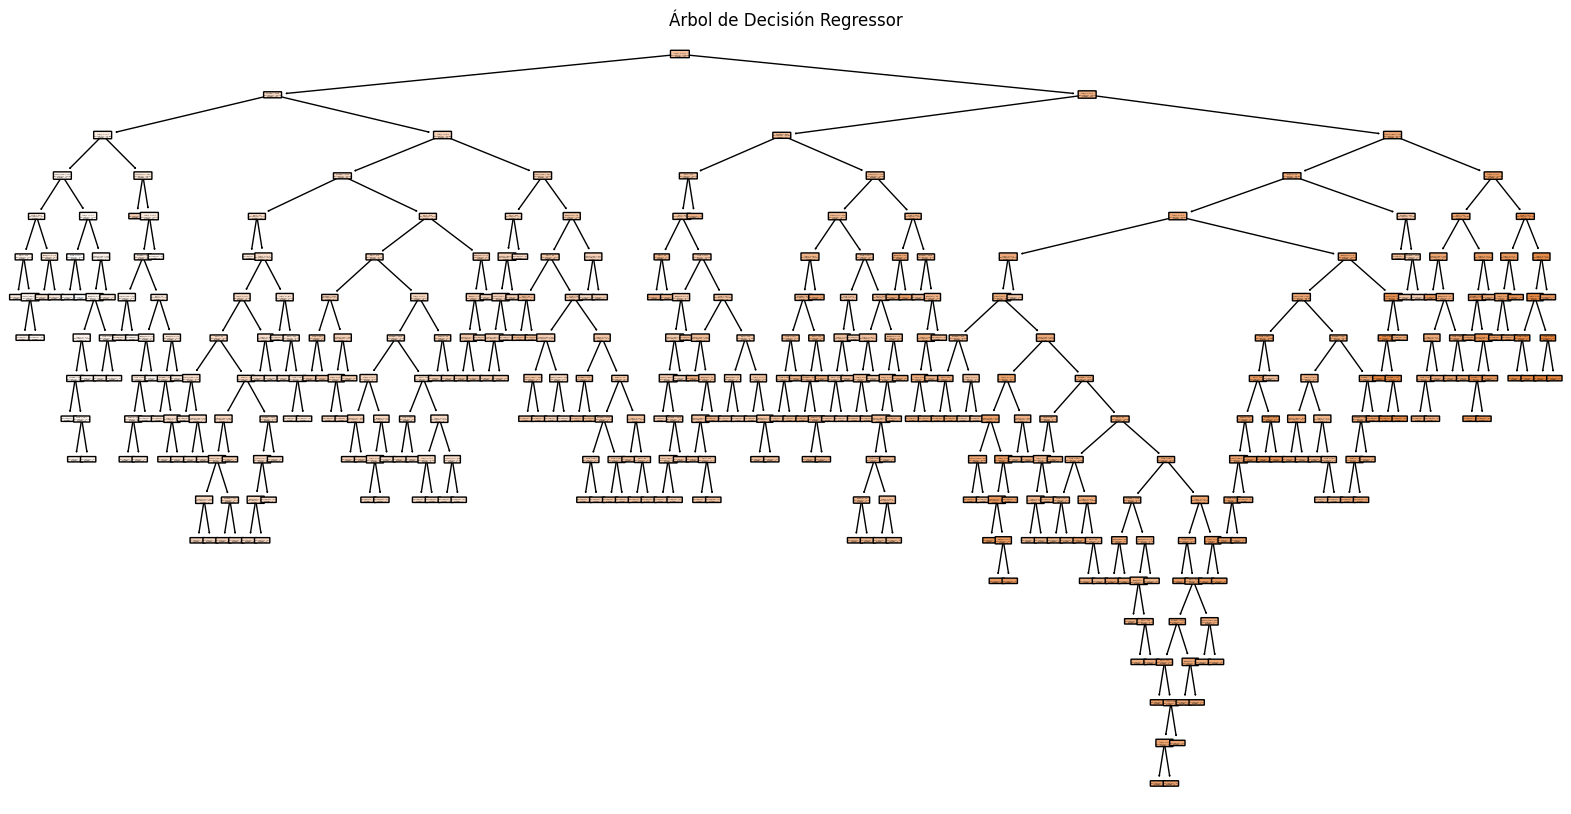

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 10))

# Dibujar el árbol (con nombres de las features si están disponibles)
plot_tree(regresor_arbol, filled=True, feature_names=X.columns, rounded=True)

plt.title("Árbol de Decisión Regressor")
plt.show()

### Ejercicio 8. 

Instancia un nuevo árbol ahora con max_depth a 3 y vuelve a entrenarlo

In [16]:
dtr3 = DecisionTreeRegressor(max_depth=3)
dtr3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

### Ejercicio 9

Vuelve a calcular MAE y MAPE

In [17]:
y_pred = dtr3.predict(X_test)

# Calcular MAE manualmente
errores_absolutos = np.abs(y_test - y_pred)
mae = np.mean(errores_absolutos)

print(f"MAE (calculado manualmente): {mae:.4f}")


MAE (calculado manualmente): 4.4244


In [18]:
error = abs(y_test - y_pred)
print('MAPE:',np.round(100*np.mean(error/y_test),2),'%')

MAPE: 6.94 %


### Ejercicio 10

Vuelve a representar su árbol

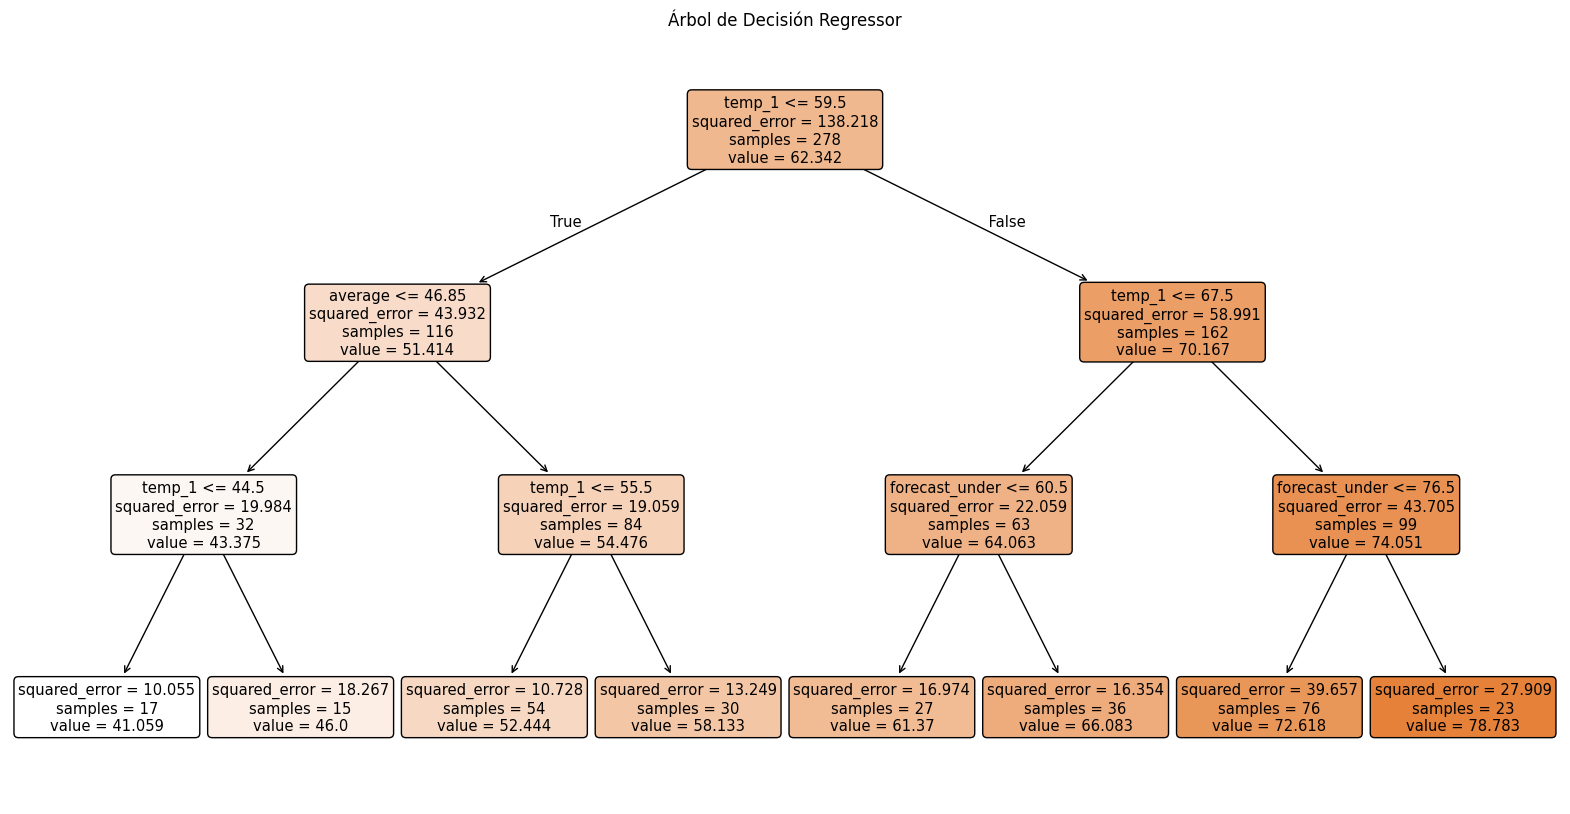

In [19]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 10))

# Dibujar el árbol (con nombres de las features si están disponibles)
plot_tree(dtr3, filled=True, feature_names=X.columns, rounded=True)

plt.title("Árbol de Decisión Regressor")
plt.show()

### Ejercicio 11

Obten el `feature_importances` de cada variable en el último modelo. Los árboles una vez entrenados tienen un atributo que te lo permite, revisa la documentación si es necesario.

In [20]:
dtr3.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.88020751,
       0.08841159, 0.        , 0.        , 0.0313809 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [21]:
pd.DataFrame({'features':X.columns,
              'importance':dtr3.feature_importances_}).sort_values('importance',
                                                                  ascending=False)

,features,importance
4,temp_1,0.880208
5,average,0.088412
8,forecast_under,0.031381
10,week_Fri,0.000000
15,week_Tues,0.000000
14,week_Thurs,0.000000
13,week_Sun,0.000000
12,week_Sat,0.000000
11,week_Mon,0.000000
0,year,0.000000
